Ten eerste willen we inzicht krijgen in de data dit doen we door met behulp van pandas de data in te laden uit de csv. Daarnaast is het handig om het pad naar de images direct op te slaan.

In [1]:
import pandas as pd
import os
import skimage
import skimage.io
import skimage.transform
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

C:\Users\weyns\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
bees_df = pd.read_csv('bee_data.csv')
bees_df.sample(100).head()

file     date   time             location  zip code  \
1297  005_365.png   7/7/18  12:56    Saratoga, CA, USA     95070   
1825  040_335.png  8/21/18  15:56      Athens, GA, USA     30607   
3986  032_360.png  8/21/18   9:00  Des Moines, IA, USA     50315   
334   022_128.png  8/10/18  13:54    Saratoga, CA, USA     95070   
2841  010_394.png  8/19/18  12:46  Des Moines, IA, USA     50315   

               subspecies                    health  pollen_carrying   caste  
1297    Italian honey bee                   healthy            False  worker  
1825    Italian honey bee  few varrao, hive beetles            False  worker  
3986    Russian honey bee                   healthy            False  worker  
334     Italian honey bee                   healthy            False  worker  
2841  Carniolan honey bee                   healthy            False  worker

In [3]:
IMG_PATH = "./bee_imgs/bee_imgs/"

In [4]:
bees_df.shape

(5172, 9)

In [5]:
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data(bees_df)

Total  Percent
file                 0      0.0
date                 0      0.0
time                 0      0.0
location             0      0.0
zip code             0      0.0
subspecies           0      0.0
health               0      0.0
pollen_carrying      0      0.0
caste                0      0.0

In [6]:
image_files = list(os.listdir(IMG_PATH))
print("Number of image files: {}".format(len(image_files)))

Number of image files: 5173


In [7]:
file_names = list(bees_df['file'])
print("Matching image names: {}".format(len(set(file_names).intersection(image_files))))

Matching image names: 5172


In [8]:
def read_image_sizes(file_name):
    image = skimage.io.imread(IMG_PATH + file_name)
    return list(image.shape)
print(read_image_sizes("001_043.png"))

[64, 68, 3]


In [9]:
# imagenames = bees_df.loc[:, "file"]
# for index, value in imagenames.items():
#     m = np.stack(bees_df['file'].apply(read_image_sizes))
#     df = pd.DataFrame(m,columns=['w','h','c'])
#     bees_df = pd.concat([bees_df, df], axis = 1, sort=False)

In [10]:
# Fixing random state for reproducibility
# np.random.seed(19680801)
# N = 50
# x = np.random.rand(N)
# y = np.random.rand(N)
# colors = np.random.rand(N)
# area = (30 * np.random.rand(N))**2  # 0 to 15 point radii
# plt.scatter(x, y, s=area, c=colors, alpha=0.5)
# plt.show()

In [11]:
health = bees_df['health']
health_mask = health == "healthy"
healthy_bees_df = bees_df.loc[health_mask]
unhealthy_mask = health != "healthy"
unhealthy_bees_df = bees_df.loc[unhealthy_mask]

['-1' 'Italian honey bee' 'VSH Italian honey bee' 'Carniolan honey bee'
 'Russian honey bee' '1 Mixed local stock 2' 'Western honey bee']


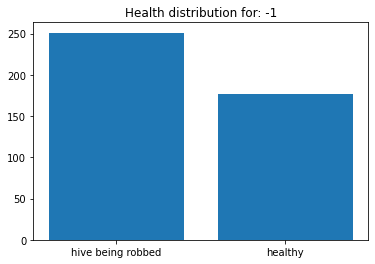

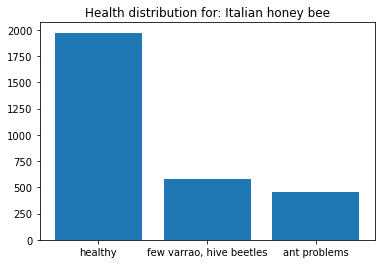

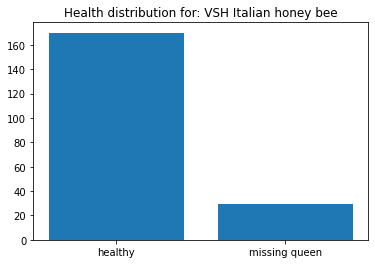

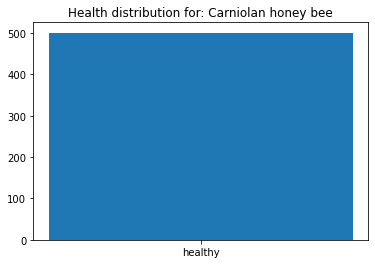

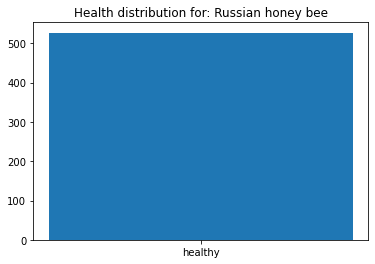

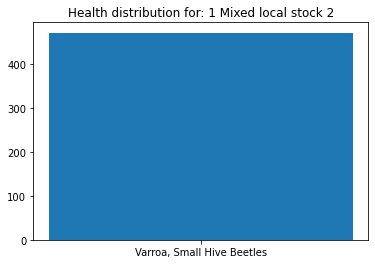

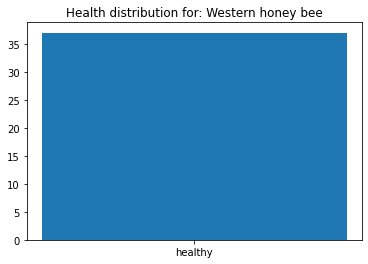

In [12]:
subspecies = bees_df.loc[:, 'subspecies']
names = subspecies.unique()
print(names)
for name in names:
    subspecies_mask = subspecies == name
    subspecies_bees_df = bees_df.loc[subspecies_mask]
    health_subspecies = subspecies_bees_df.loc[:,'health']
    subspecies_count = subspecies_bees_df['health'].value_counts()
    subspecies_count_df = pd.DataFrame(subspecies_count)
    healthdist_subspecies = subspecies_count_df.iloc[:,0]
    x = subspecies_count.index.values.tolist()
    y = healthdist_subspecies.values.tolist()
    plt.bar(x,y)
    plt.title("Health distribution for: " + name)
    plt.show()
    

In [13]:
health = bees_df.loc[:,'health']
hivebeetles1_mask = health == 'Varroa, Small Hive Beetles'
hivebeetles2_mask = health == 'few varrao, hive beetles'

hivebeetles = bees_df.loc[hivebeetles1_mask|hivebeetles2_mask]

bees_df['health'] = bees_df['health'].replace(['Varroa, Small Hive Beetles', 'few varrao, hive beetles'], 'Varroa, Hive Beetles')

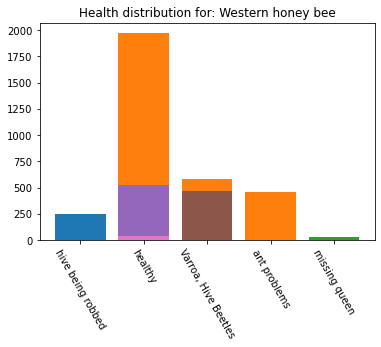

In [14]:
for name in names:
    subspecies_mask = subspecies == name
    subspecies_bees_df = bees_df.loc[subspecies_mask]
    health_subspecies = subspecies_bees_df.loc[:,'health']
    subspecies_count = subspecies_bees_df['health'].value_counts()
    subspecies_count_df = pd.DataFrame(subspecies_count)
    healthdist_subspecies = subspecies_count_df.iloc[:,0]
    x = subspecies_count.index.values.tolist()
    y = healthdist_subspecies.values.tolist()
    plt.bar(x,y)
    plt.title("Health distribution for: " + name)
    plt.xticks(rotation=300)
    # plt.show()
    

DateTime manip

In [15]:
bees_df['date_time'] = pd.to_datetime(bees_df['date'] + ' ' + bees_df['time'])
bees_df["year"] = bees_df['date_time'].dt.year
bees_df["month"] = bees_df['date_time'].dt.month
bees_df["day"] = bees_df['date_time'].dt.day
bees_df["hour"] = bees_df['date_time'].dt.hour
bees_df["minute"] = bees_df['date_time'].dt.minute

tmp = bees_df.groupby(['subspecies'])['year'].value_counts()
df = pd.DataFrame(data={'Images': tmp.values}, index=tmp.index).reset_index()
df

subspecies  year  Images
0                     -1  2018     428
1  1 Mixed local stock 2  2018     472
2    Carniolan honey bee  2018     501
3      Italian honey bee  2018    3008
4      Russian honey bee  2018     527
5  VSH Italian honey bee  2018     199
6      Western honey bee  2018      37

<BarContainer object of 5172 artists>

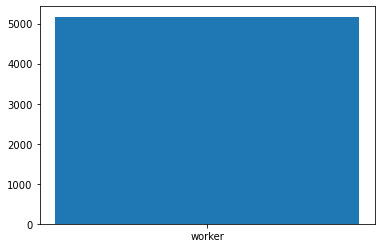

In [16]:
x = bees_df['caste']
y = bees_df['caste'].value_counts()
plt.bar(x,y)

In [17]:
tmp = bees_df.groupby(['zip code'])['location'].value_counts()
df = pd.DataFrame(data={'Images': tmp.values}, index=tmp.index).reset_index()
df

zip code              location  Images
0      3431        Keene, NH, USA      92
1     30607       Athens, GA, USA     579
2     30607  Athens, Georgia, USA     472
3     50315   Des Moines, IA, USA     973
4     70115  New Orleans, LA, USA     170
5     77511        Alvin, TX, USA     737
6     95070     Saratoga, CA, USA    2000
7     95124     San Jose, CA, USA     149

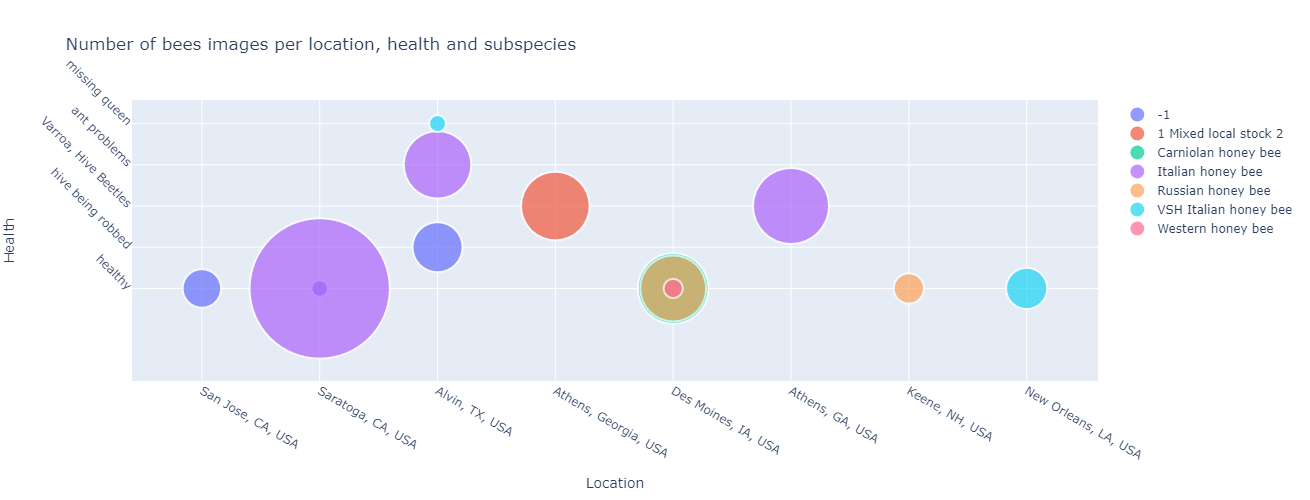

In [18]:
import plotly.graph_objs as go
from plotly.offline import iplot
tmp = bees_df.groupby(['health', 'location'])['subspecies'].value_counts()
df = pd.DataFrame(data={'Images': tmp.values}, index=tmp.index).reset_index()
hover_text = []
for index, row in df.iterrows():
    hover_text.append(('Subspecies: {}<br>'+
                      'Health: {}<br>'+
                      'Location: {}<br>'+
                      'Images: {}').format(row['subspecies'],
                                            row['health'],
                                            row['location'],
                                            row['Images']))
df['hover_text'] = hover_text
subspecies = (bees_df.groupby(['subspecies'])['subspecies'].nunique()).index
data = []
for subs in subspecies:
    dfL = df[df['subspecies']==subs]
    trace = go.Scatter(
        x = dfL['location'],y = dfL['health'],
        name=subs,
        marker=dict(
            symbol='circle',
            sizemode='area',
            sizeref=0.2,
            size=dfL['Images'],
            line=dict(
                width=2
            ),),
        mode = "markers",
        text=dfL['hover_text'],
    )
    data.append(trace)
    
layout = dict(title = 'Number of bees images per location, health and subspecies',
          xaxis = dict(title = 'Location', showticklabels=True), 
          yaxis = dict(title = 'Health', tickangle=45),
          hovermode = 'closest',
          height=500,
          width=1000
         )
fig = dict(data = data, layout = layout)
iplot(fig, filename='images-subspecies-health-location')

In [19]:
import imageio
def draw_category_images(var,cols=5):
    categories = (bees_df.groupby([var])[var].nunique()).index
    f, ax = plt.subplots(nrows=len(categories),ncols=cols, figsize=(2*cols,2*len(categories)))
    # draw a number of images for each location
    for i, cat in enumerate(categories):
        sample = bees_df[bees_df[var]==cat].sample(cols)
        for j in range(0,cols):
            file=IMG_PATH + sample.iloc[j]['file']
            im=imageio.imread(file)
            ax[i, j].imshow(im, resample=True)
            ax[i, j].set_title(cat, fontsize=9)  
    plt.tight_layout()
    plt.show()

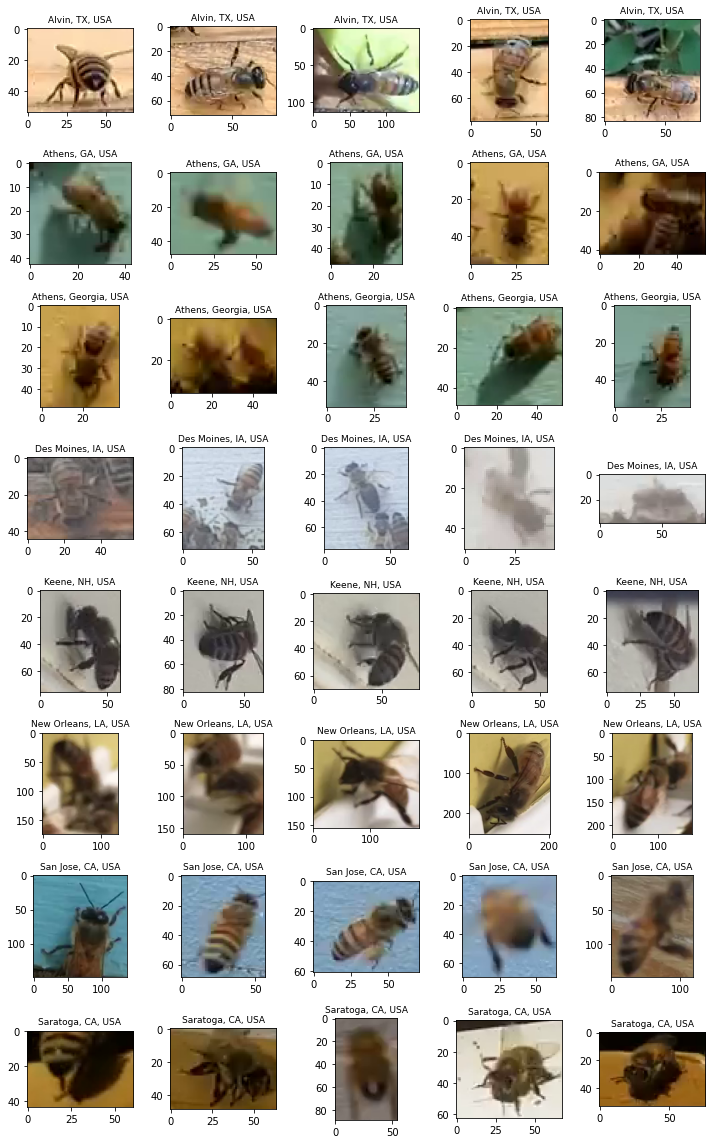

In [20]:
draw_category_images("location")

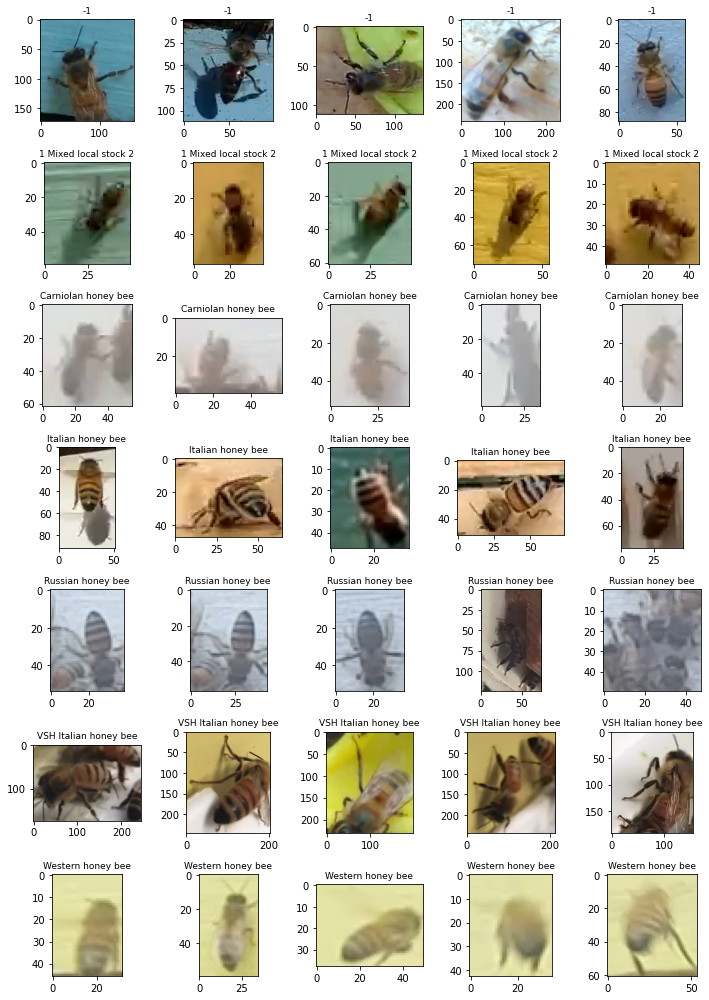

In [21]:
draw_category_images("subspecies")

Change VSH italian honey bee to Italian honey bee as there is no visible difference between the two

In [22]:
bees_df['subspecies'] = bees_df['subspecies'].replace(['VSH Italian honey bee'], 'Italian honey bee')
italian_bee_mask = subspecies == 'Italian honey bee'

Start Modelling by splitting data

In [23]:
TEST_SIZE = 0.2
VAL_SIZE = 0.2
NO_EPOCHS_1 = 5
NO_EPOCHS_2 = 10
NO_EPOCHS_3 = 50
RANDOM_STATE = 2018
IMAGE_WIDTH = 100
IMAGE_HEIGHT = 100
IMAGE_CHANNELS = 3
CONV_2D_DIM_1 = 16
CONV_2D_DIM_2 = 16
CONV_2D_DIM_3 = 32
CONV_2D_DIM_4 = 64
MAX_POOL_DIM = 2
KERNEL_SIZE = 3

train_df, test_df = train_test_split(bees_df, test_size=TEST_SIZE, random_state=RANDOM_STATE, 
                                     stratify=bees_df['health'])

In [24]:
train_df, val_df = train_test_split(train_df, test_size=VAL_SIZE, random_state=RANDOM_STATE, stratify=train_df['health'])

In [25]:
print("Training: {}".format(train_df.shape[0]))
print("Test: {}".format(test_df.shape[0]))
print("Validation: {}".format(val_df.shape[0]))

Training: 3309
Test: 1035
Validation: 828


In [26]:
def read_image(file_name):
    image = skimage.io.imread(IMG_PATH + file_name)
    image = skimage.transform.resize(image, (IMAGE_WIDTH, IMAGE_HEIGHT), mode='reflect')
    return image[:,:,:IMAGE_CHANNELS]

In [27]:
def categories_encoder(dataset, var='health'):
    X = np.stack(dataset['file'].apply(read_image))
    y = pd.get_dummies(dataset[var], drop_first=False)
    return X, y

In [28]:
X_train, y_train = categories_encoder(train_df)
X_val, y_val = categories_encoder(val_df)
X_test, y_test = categories_encoder(test_df)

In [29]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D, Dropout, BatchNormalization,LeakyReLU
import tensorflow
model1=Sequential()
model1.add(Conv2D(CONV_2D_DIM_1, kernel_size=KERNEL_SIZE, input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT,IMAGE_CHANNELS), activation='relu', padding='same'))
model1.add(MaxPool2D(MAX_POOL_DIM))
model1.add(Conv2D(CONV_2D_DIM_2, kernel_size=KERNEL_SIZE, activation='relu', padding='same'))
model1.add(Flatten())
model1.add(Dense(y_train.columns.size, activation='softmax'))
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [30]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 16)        2320      
                                                                 
 flatten (Flatten)           (None, 40000)             0         
                                                                 
 dense (Dense)               (None, 5)                 200005    
                                                                 
Total params: 202,773
Trainable params: 202,773
Non-trainable params: 0
__________________________________________________

In [31]:
from keras.preprocessing.image import ImageDataGenerator
image_generator = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False,
        rotation_range=180,
        zoom_range = 0.1, 
        width_shift_range=0.1,
        height_shift_range=0.1, 
        horizontal_flip=True,
        vertical_flip=True)
image_generator.fit(X_train)

In [32]:
BATCH_SIZE = 32
train_model1  = model1.fit_generator(image_generator.flow(X_train, y_train, batch_size=BATCH_SIZE),
                        epochs=NO_EPOCHS_1,
                        validation_data=[X_val, y_val],
                        steps_per_epoch=len(X_train)/BATCH_SIZE)

C:\Users\weyns\AppData\Local\Temp\ipykernel_16964\2308486789.py:2: UserWarning:

`Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.



Epoch 1/5
103/103 [==============================] - 19s 167ms/step - loss: 0.6851 - accuracy: 0.7474 - val_loss: 0.4256 - val_accuracy: 0.8285
Epoch 2/5
103/103 [==============================] - 18s 175ms/step - loss: 0.3580 - accuracy: 0.8658 - val_loss: 0.2685 - val_accuracy: 0.8949
Epoch 3/5
103/103 [==============================] - 19s 181ms/step - loss: 0.2945 - accuracy: 0.8942 - val_loss: 0.2615 - val_accuracy: 0.9239
Epoch 4/5
103/103 [==============================] - 20s 192ms/step - loss: 0.2488 - accuracy: 0.9151 - val_loss: 0.1941 - val_accuracy: 0.9372
Epoch 5/5
103/103 [==============================] - 19s 182ms/step - loss: 0.2158 - accuracy: 0.9248 - val_loss: 0.1635 - val_accuracy: 0.9372


C:\Users\weyns\anaconda3\lib\site-packages\plotly\tools.py:461: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



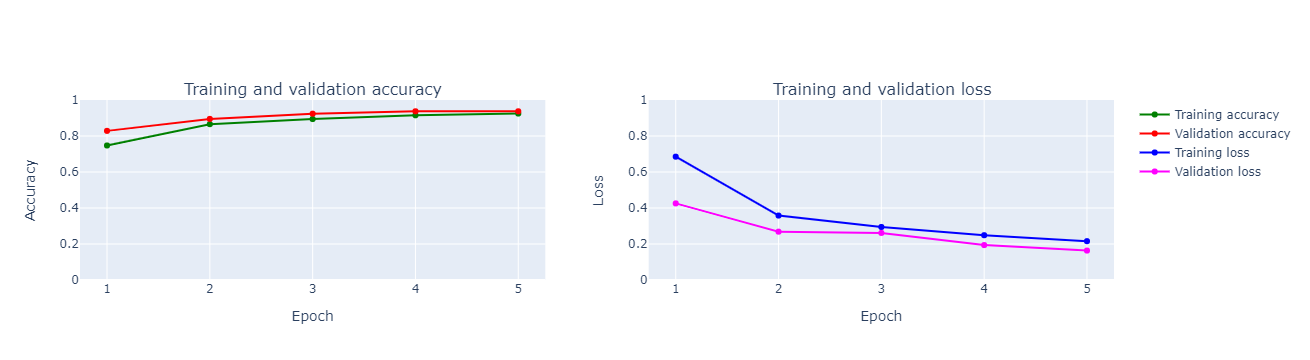

In [33]:
from plotly import tools
def create_trace(x,y,ylabel,color):
        trace = go.Scatter(
            x = x,y = y,
            name=ylabel,
            marker=dict(color=color),
            mode = "markers+lines",
            text=x
        )
        return trace
    
def plot_accuracy_and_loss(train_model):
    hist = train_model.history
    acc = hist['accuracy']
    val_acc = hist['val_accuracy']
    loss = hist['loss']
    val_loss = hist['val_loss']
    epochs = list(range(1,len(acc)+1))
    #define the traces
    trace_ta = create_trace(epochs,acc,"Training accuracy", "Green")
    trace_va = create_trace(epochs,val_acc,"Validation accuracy", "Red")
    trace_tl = create_trace(epochs,loss,"Training loss", "Blue")
    trace_vl = create_trace(epochs,val_loss,"Validation loss", "Magenta")
    fig = tools.make_subplots(rows=1,cols=2, subplot_titles=('Training and validation accuracy',
                                                             'Training and validation loss'))
    #add traces to the figure
    fig.append_trace(trace_ta,1,1)
    fig.append_trace(trace_va,1,1)
    fig.append_trace(trace_tl,1,2)
    fig.append_trace(trace_vl,1,2)
    #set the layout for the figure
    fig['layout']['xaxis'].update(title = 'Epoch')
    fig['layout']['xaxis2'].update(title = 'Epoch')
    fig['layout']['yaxis'].update(title = 'Accuracy', range=[0,1])
    fig['layout']['yaxis2'].update(title = 'Loss', range=[0,1])
    
    #plot
    iplot(fig, filename='accuracy-loss')

plot_accuracy_and_loss(train_model1)

In [34]:
score = model1.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.20297586917877197
Test accuracy: 0.9246376752853394


In [35]:
from sklearn import metrics
def test_accuracy_report(model):
    predicted = model.predict(X_test)
    test_predicted = np.argmax(predicted, axis=1)
    test_truth = np.argmax(y_test.values, axis=1)
    print(metrics.classification_report(test_truth, test_predicted, target_names=y_test.columns)) 
    test_res = model.evaluate(X_test, y_test.values, verbose=0)
    print('Loss function: %s, accuracy:' % test_res[0], test_res[1])

In [36]:
test_accuracy_report(model1)

33/33 [==============================] - 1s 29ms/step
                      precision    recall  f1-score   support

Varroa, Hive Beetles       0.95      0.86      0.90       210
        ant problems       0.88      1.00      0.93        92
             healthy       0.94      0.96      0.95       677
   hive being robbed       0.71      0.64      0.67        50
       missing queen       0.80      0.67      0.73         6

            accuracy                           0.92      1035
           macro avg       0.86      0.83      0.84      1035
        weighted avg       0.92      0.92      0.92      1035

Loss function: 0.20297586917877197, accuracy: 0.9246376752853394


In [37]:
model2=Sequential()
model2.add(Conv2D(CONV_2D_DIM_1, kernel_size=KERNEL_SIZE, input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT,IMAGE_CHANNELS), activation='relu', padding='same'))
model2.add(MaxPool2D(MAX_POOL_DIM))
# Add dropouts to the model
model2.add(Dropout(0.4))
model2.add(Conv2D(CONV_2D_DIM_2, kernel_size=KERNEL_SIZE, activation='relu', padding='same'))
# Add dropouts to the model
model2.add(Dropout(0.4))
model2.add(Flatten())
model2.add(Dense(y_train.columns.size, activation='softmax'))
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [38]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 100, 100, 16)      448       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 50, 50, 16)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 50, 50, 16)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 50, 50, 16)        2320      
                                                                 
 dropout_1 (Dropout)         (None, 50, 50, 16)        0         
                                                                 
 flatten_1 (Flatten)         (None, 40000)             0         
                                                      

In [74]:
train_model2  = model2.fit(image_generator.flow(X_train, y_train, batch_size=BATCH_SIZE),
                        epochs=NO_EPOCHS_2,
                        validation_data=[X_val, y_val],
                        steps_per_epoch=len(X_train)/BATCH_SIZE)

Epoch 1/10
103/103 [==============================] - 48s 409ms/step - loss: 0.1578 - accuracy: 0.9523 - val_loss: 0.0874 - val_accuracy: 0.9698
Epoch 2/10
103/103 [==============================] - 23s 218ms/step - loss: 0.1393 - accuracy: 0.9544 - val_loss: 0.0798 - val_accuracy: 0.9746
Epoch 3/10
103/103 [==============================] - 20s 190ms/step - loss: 0.1313 - accuracy: 0.9529 - val_loss: 0.0879 - val_accuracy: 0.9734
Epoch 4/10
103/103 [==============================] - 20s 192ms/step - loss: 0.1242 - accuracy: 0.9580 - val_loss: 0.0617 - val_accuracy: 0.9807
Epoch 5/10
103/103 [==============================] - 21s 198ms/step - loss: 0.1314 - accuracy: 0.9583 - val_loss: 0.1884 - val_accuracy: 0.9275
Epoch 6/10
103/103 [==============================] - 19s 182ms/step - loss: 0.1301 - accuracy: 0.9559 - val_loss: 0.0649 - val_accuracy: 0.9783
Epoch 7/10
103/103 [==============================] - 20s 188ms/step - loss: 0.1034 - accuracy: 0.9659 - val_loss: 0.1152 - val_ac

C:\Users\weyns\anaconda3\lib\site-packages\plotly\tools.py:461: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



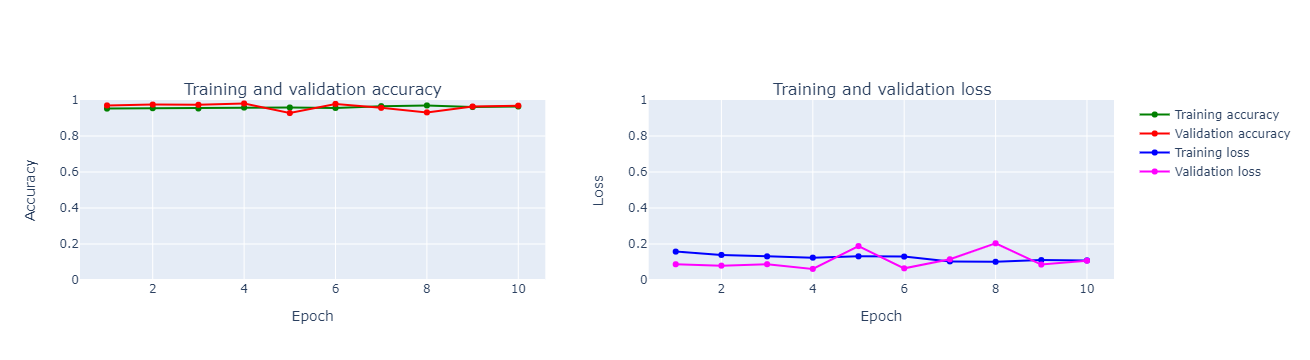

In [ ]:
plot_accuracy_and_loss(train_model2)

In [ ]:
test_accuracy_report(model2)

33/33 [==============================] - 1s 25ms/step
                      precision    recall  f1-score   support

Varroa, Hive Beetles       0.96      0.95      0.96       210
        ant problems       0.88      1.00      0.94        92
             healthy       0.98      0.97      0.97       677
   hive being robbed       0.89      0.78      0.83        50
       missing queen       0.75      1.00      0.86         6

            accuracy                           0.96      1035
           macro avg       0.89      0.94      0.91      1035
        weighted avg       0.96      0.96      0.96      1035

Loss function: 0.141912579536438, accuracy: 0.9594202637672424


In [42]:
from keras.callbacks import ModelCheckpoint, Callback, EarlyStopping, ReduceLROnPlateau, LearningRateScheduler

PATIENCE = 5
VERBOSE = 1

annealer3 = LearningRateScheduler(lambda x: 1e-3 * 0.995 ** (x+NO_EPOCHS_3))
earlystopper3 = EarlyStopping(monitor='loss', patience=PATIENCE, verbose=VERBOSE)
checkpointer3 = ModelCheckpoint('best_model_3.h5',
                                monitor='val_acc',
                                verbose=VERBOSE,
                                save_best_only=True,
                                save_weights_only=True)

In [43]:
model3=Sequential()
model3.add(Conv2D(CONV_2D_DIM_1, kernel_size=KERNEL_SIZE, input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT,IMAGE_CHANNELS), activation='relu', padding='same'))
model3.add(MaxPool2D(MAX_POOL_DIM))
# Add dropouts to the model
model3.add(Dropout(0.4))
model3.add(Conv2D(CONV_2D_DIM_2, kernel_size=KERNEL_SIZE, activation='relu', padding='same'))
# Add dropouts to the model
model3.add(Dropout(0.4))
model3.add(Flatten())
model3.add(Dense(y_train.columns.size, activation='softmax'))
model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [44]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 100, 100, 16)      448       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 50, 50, 16)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 50, 50, 16)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 50, 50, 16)        2320      
                                                                 
 dropout_3 (Dropout)         (None, 50, 50, 16)        0         
                                                                 
 flatten_2 (Flatten)         (None, 40000)             0         
                                                      

In [45]:
train_model3  = model3.fit_generator(image_generator.flow(X_train, y_train, batch_size=BATCH_SIZE),
                        epochs=NO_EPOCHS_3,
                        validation_data=[X_val, y_val],
                        steps_per_epoch=len(X_train)/BATCH_SIZE,
                        callbacks=[earlystopper3, checkpointer3, annealer3])

C:\Users\weyns\AppData\Local\Temp\ipykernel_16964\2443815439.py:1: UserWarning:

`Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.



Epoch 1/50
103/103 [==============================] - 46s 339ms/step - loss: 0.9819 - accuracy: 0.6785 - val_loss: 1.2900 - val_accuracy: 0.5217 - lr: 7.7831e-04
Epoch 2/50
103/103 [==============================] - 18s 177ms/step - loss: 0.7520 - accuracy: 0.7573 - val_loss: 0.8598 - val_accuracy: 0.7971 - lr: 7.7442e-04
Epoch 3/50
103/103 [==============================] - 20s 193ms/step - loss: 0.5329 - accuracy: 0.8120 - val_loss: 0.4704 - val_accuracy: 0.8261 - lr: 7.7055e-04
Epoch 4/50
103/103 [==============================] - 19s 185ms/step - loss: 0.4073 - accuracy: 0.8504 - val_loss: 0.2911 - val_accuracy: 0.9143 - lr: 7.6670e-04
Epoch 5/50
103/103 [==============================] - 20s 190ms/step - loss: 0.3003 - accuracy: 0.8957 - val_loss: 0.1956 - val_accuracy: 0.9360 - lr: 7.6286e-04
Epoch 6/50
103/103 [==============================] - 20s 188ms/step - loss: 0.2464 - accuracy: 0.9112 - val_loss: 0.1753 - val_accuracy: 0.9432 - lr: 7.5905e-04
Epoch 7/50
103/103 [========

C:\Users\weyns\anaconda3\lib\site-packages\plotly\tools.py:461: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



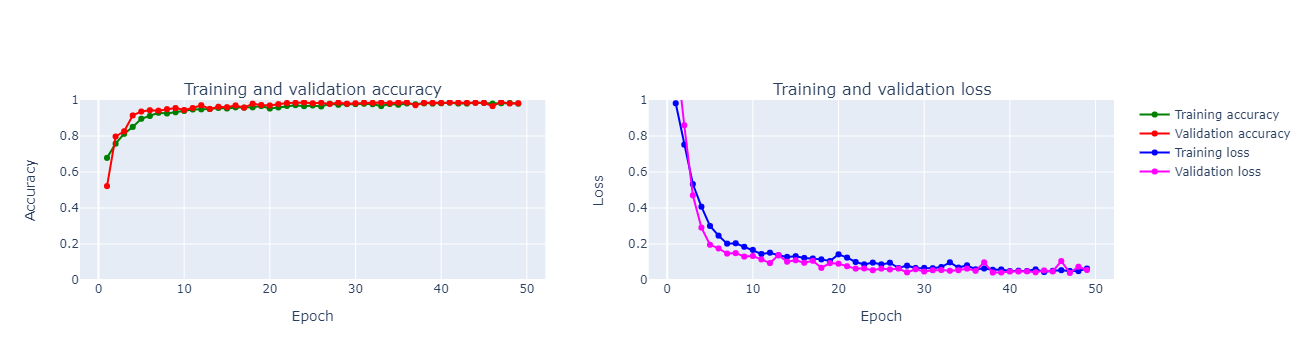

In [46]:
plot_accuracy_and_loss(train_model3)

In [47]:
test_accuracy_report(model3)

33/33 [==============================] - 1s 33ms/step
                      precision    recall  f1-score   support

Varroa, Hive Beetles       0.97      0.92      0.95       210
        ant problems       1.00      0.99      0.99        92
             healthy       0.97      0.99      0.98       677
   hive being robbed       0.95      0.84      0.89        50
       missing queen       0.86      1.00      0.92         6

            accuracy                           0.97      1035
           macro avg       0.95      0.95      0.95      1035
        weighted avg       0.97      0.97      0.97      1035

Loss function: 0.0822720155119896, accuracy: 0.9719806909561157


In [95]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
def create_confusion_matrix(model):
    predicted = model.predict(X_test)
    
    test_predicted = np.argmax(predicted, axis=1).astype(str)
    test_truth = np.argmax(y_test.values, axis=1).astype(str)
    
    def make_labels(data):
        for index, val in enumerate(data):
            if val == 0:
                data[index] = "Varroa, Hive Beetles"
            elif val == 1:
                data[index] = "ant problems"
            elif val == 2:
                data[index] = "healthy"
            elif val == 3:
                data[index] = "hive being robbed"
            elif val == 4:
                data[index] = "missing queen"
    make_labels(test_truth)
    make_labels(test_predicted)
    cm = metrics.multilabel_confusion_matrix(test_truth, test_predicted, labels=y_test.columns)
    
    labels = ['Varroa, Hive Beetles', 'ant problems', 'healthy', 'hive being robbed',
       'missing queen']
    
    for label_col in range(len(y_test.columns)):
        y_true_label = test_truth[:, label_col]
        y_pred_label = test_predicted[:, label_col]
        conf_mat_dict[labels[label_col]] = confusion_matrix(test_predicted=y_pred_label, test_truth=y_true_label)


    for label, matrix in conf_mat_dict.items():
        print("Confusion matrix for label {}:".format(label))
        print(matrix)
    # print(cm)
    # disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=y_test.columns)
    # disp.plot(xticks_rotation='vertical')
    # plt.show()
    test_res = model.evaluate(X_test, y_test.values, verbose=0)
    print('Loss function: %s, accuracy:' % test_res[0], test_res[1])
    
    
print(y_test.columns)
create_confusion_matrix(model3)


Index(['Varroa, Hive Beetles', 'ant problems', 'healthy', 'hive being robbed',
       'missing queen'],
      dtype='object')
33/33 [==============================] - 2s 47ms/step


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed